<a href="https://colab.research.google.com/github/karriechou/inf2179-ml-challenge/blob/main/KarrieChou_inf2179_ml_challenge_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
random.seed(123)

# One-hot encoding of variables

In [66]:
training_data = pd.read_csv("train.csv")
training_data.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN06611,1,0,1,1,Meal Plan 2,0,Room_Type 1,247,2018,6,6,Offline,0,0,0,90.00,0,Not_Canceled
1,INN28944,2,0,0,3,Meal Plan 1,0,Room_Type 4,48,2018,6,8,Online,0,0,0,98.87,2,Not_Canceled
2,INN21921,2,0,1,5,Meal Plan 1,0,Room_Type 4,124,2018,9,20,Online,0,0,0,143.10,0,Canceled
3,INN12669,1,0,0,2,Meal Plan 1,1,Room_Type 1,37,2017,9,16,Online,0,0,0,85.50,0,Not_Canceled
4,INN30837,3,0,1,3,Meal Plan 1,0,Room_Type 4,73,2018,7,4,Online,0,0,0,150.30,2,Not_Canceled


In [67]:
# training_data["type_of_meal_plan"].unique()
training_data["type_of_meal_plan_onehot"] = training_data["type_of_meal_plan"].replace({"Not Selected": 0, 
                                                                                        "Meal Plan 1": 1, 
                                                                                        "Meal Plan 2": 2, 
                                                                                        "Meal Plan 3": 3})

# training_data["room_type_reserved"].unique()
training_data["room_type_reserved_onehot"] = training_data["room_type_reserved"].replace({"Room_Type 1": 0, 
                                                                                          "Room_Type 2": 1, 
                                                                                          "Room_Type 3": 2, 
                                                                                          "Room_Type 4": 3, 
                                                                                          "Room_Type 5": 4, 
                                                                                          "Room_Type 6": 5, 
                                                                                          "Room_Type 7": 6})

# training_data["arrival_year"].unique()
training_data["arrival_year_onehot"] = training_data["arrival_year"].replace({2017: 0, 
                                                                              2018: 1})


# training_data["market_segment_type"].unique()
training_data["market_segment_type_onehot"] = training_data["market_segment_type"].replace({"Offline": 0, 
                                                                                            "Online": 1, 
                                                                                            "Corporate": 2, 
                                                                                            "Aviation": 3, 
                                                                                            "Complementary": 4})

training_data = training_data.drop(["type_of_meal_plan", "room_type_reserved", "market_segment_type"], axis = 1)

# EDA – plots

<BarContainer object of 6 artists>

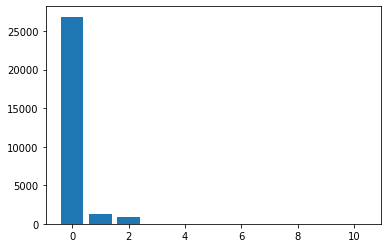

In [68]:
no_of_children_index = training_data["no_of_children"].value_counts().index.tolist()
no_of_children_count = training_data["no_of_children"].value_counts().sort_index(ascending = True)
plt.bar(x = no_of_children_index, height = no_of_children_count)

<BarContainer object of 5 artists>

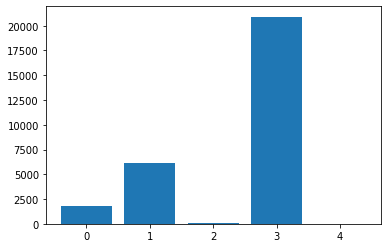

In [69]:
no_of_adults_index = training_data["no_of_adults"].value_counts().index.tolist()
no_of_adults_count = training_data["no_of_adults"].value_counts().sort_index(ascending = True)
plt.bar(x = no_of_adults_index, height = no_of_adults_count)

<AxesSubplot:xlabel='no_of_adults', ylabel='no_of_children'>

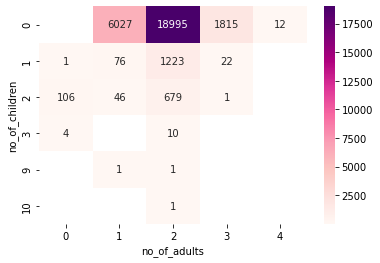

In [90]:
adults_vs_children = pd.pivot_table(data = training_data, values = "Booking_ID", columns = "no_of_adults", index = "no_of_children", aggfunc = "count")
sns.heatmap(adults_vs_children, cmap = "RdPu", annot = True, fmt = ".0f")

# EDA – t-tests

# KNN Classifier